In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Wetland/Wetland Final Dataset/W3.csv')

In [ ]:
dataset.head(5000)

,Sl,VZ,GW,M,R,C,B,E,BA,A,TWI,TPI,CR,AS,SO,L
0,63,1,6,0.029163,0.000000,0.000888,0.014613,7,60.000000,0.000000,7.252788,0.222222,0.111111,281.309936,2,3
1,72,1,6,0.024442,0.000000,0.001600,0.014356,10,108.166542,0.000000,7.811803,-0.666667,-0.333333,300.963745,2,4
2,80,1,6,0.023546,0.000868,0.000888,0.015250,7,30.000000,30.000000,10.674983,-0.666667,-0.222222,341.565064,2,4
3,96,1,2,0.025498,0.000614,0.004187,0.014212,6,94.868332,67.082039,7.436651,0.555555,0.222222,315.000000,2,5
4,106,1,6,0.022431,0.001840,0.003106,0.017491,5,120.000000,174.928558,12.749857,0.000000,0.000000,315.000000,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,1301,5,7,0.049883,0.018688,0.005769,0.041172,2,308.868897,349.857117,15.384127,0.000000,0.000000,-1.000000,2,4
922,1863,5,2,0.024774,0.019755,0.003994,0.036657,2,450.998901,335.410187,13.253391,0.000000,0.000000,-1.000000,2,4
923,2036,5,7,0.042905,0.017567,0.005786,0.047425,1,424.264069,324.499603,13.567049,0.000000,0.000000,-1.000000,2,6
924,2037,5,7,0.041696,0.018053,0.006672,0.047549,1,417.851654,276.586334,13.710150,0.000000,0.000000,-1.000000,2,6


In [ ]:
#VH = len(dataset[dataset['VZ'] == 1])

In [ ]:
#H = len(dataset[dataset['VZ'] == 2])

In [ ]:
#M = len(dataset[dataset['VZ'] == 3])

In [ ]:
#L = len(dataset[dataset['VZ'] == 4])

In [ ]:
#VL = len(dataset[dataset['VZ'] == 5])

In [ ]:
#VH_indices = df[df.Class == 0].index

In [ ]:
#random_indices = np.random.choice(VH,H,M,L,VL, replace=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


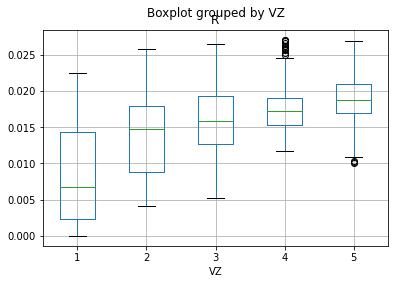

In [ ]:
_ = dataset.boxplot('R', by='VZ')

In [ ]:
observation_size = dataset.shape[0] 

In [ ]:
dataset.head()

,Sl,VZ,GW,M,R,C,B,E,BA,A,TWI,TPI,CR,AS,SO,L
0,63,1,6,0.029163,0.000000,0.000888,0.014613,7,60.000000,0.000000,7.252788,0.222222,0.111111,281.309936,2,3
1,72,1,6,0.024442,0.000000,0.001600,0.014356,10,108.166542,0.000000,7.811803,-0.666667,-0.333333,300.963745,2,4
2,80,1,6,0.023546,0.000868,0.000888,0.015250,7,30.000000,30.000000,10.674983,-0.666667,-0.222222,341.565064,2,4
3,96,1,2,0.025498,0.000614,0.004187,0.014212,6,94.868332,67.082039,7.436651,0.555555,0.222222,315.000000,2,5
4,106,1,6,0.022431,0.001840,0.003106,0.017491,5,120.000000,174.928558,12.749857,0.000000,0.000000,315.000000,2,4


In [ ]:
dataset.columns

Index(['Sl', 'VZ', 'GW', 'M', 'R', 'C', 'B', 'E', 'BA', 'A', 'TWI', 'TPI',
       'CR', 'AS', 'SO', 'L'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sl      926 non-null    int64  
 1   VZ      926 non-null    int64  
 2   GW      926 non-null    int64  
 3   M       926 non-null    float64
 4   R       926 non-null    float64
 5   C       926 non-null    float64
 6   B       926 non-null    float64
 7   E       926 non-null    int64  
 8   BA      926 non-null    float64
 9   A       926 non-null    float64
 10  TWI     926 non-null    float64
 11  TPI     926 non-null    float64
 12  CR      926 non-null    float64
 13  AS      926 non-null    float64
 14  SO      926 non-null    int64  
 15  L       926 non-null    int64  
dtypes: float64(10), int64(6)
memory usage: 115.9 KB


In [ ]:
dataset.isnull().sum()

Sl     0
VZ     0
GW     0
M      0
R      0
C      0
B      0
E      0
BA     0
A      0
TWI    0
TPI    0
CR     0
AS     0
SO     0
L      0
dtype: int64

In [ ]:
dataset.dropna(inplace = True)

In [ ]:
dataset.isnull().sum()

Sl     0
VZ     0
GW     0
M      0
R      0
C      0
B      0
E      0
BA     0
A      0
TWI    0
TPI    0
CR     0
AS     0
SO     0
L      0
dtype: int64

In [ ]:
dataset['VZ'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
dataset['VZ'].value_counts()

1    198
2    189
3    184
5    182
4    173
Name: VZ, dtype: int64

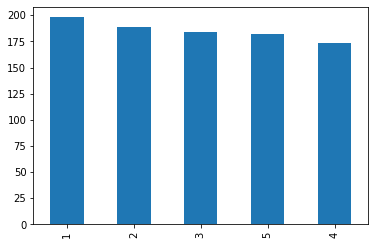

In [ ]:
dataset['VZ'].value_counts().plot.bar()

In [ ]:
dataset.corr()

,Sl,VZ,GW,M,R,C,B,E,BA,A,TWI,TPI,CR,AS,SO,L
Sl,1.000000,-0.436778,0.275720,-0.291189,-0.364601,-0.419221,-0.206426,0.178042,-0.325673,-0.503400,-0.286379,-0.021043,-0.022629,0.376689,0.187120,-0.048237
VZ,-0.436778,1.000000,-0.134953,0.588496,0.563009,0.336780,0.377477,-0.486794,0.886721,0.888748,0.545853,0.074096,0.046839,-0.702357,0.032162,0.110637
GW,0.275720,-0.134953,1.000000,0.066686,-0.270603,-0.164886,0.051966,0.177053,-0.115399,-0.201237,-0.120539,-0.044001,0.012035,0.225615,0.082072,-0.030267
M,-0.291189,0.588496,0.066686,1.000000,0.388859,0.232716,0.444368,-0.437845,0.493735,0.507744,0.488108,0.072015,0.026730,-0.538966,-0.005999,0.250239
R,-0.364601,0.563009,-0.270603,0.388859,1.000000,0.119507,0.284671,-0.367127,0.483599,0.542539,0.406264,0.081905,0.071349,-0.526499,0.045495,0.259227
C,-0.419221,0.336780,-0.164886,0.232716,0.119507,1.000000,-0.044334,-0.246692,0.262246,0.421138,0.256956,0.040226,0.020915,-0.303335,-0.298323,0.025401
B,-0.206426,0.377477,0.051966,0.444368,0.284671,-0.044334,1.000000,-0.505860,0.248741,0.228909,0.339831,0.024330,0.013037,-0.439078,0.155780,0.340184
E,0.178042,-0.486794,0.177053,-0.437845,-0.367127,-0.246692,-0.505860,1.000000,-0.379472,-0.414555,-0.607747,-0.023410,0.005758,0.674385,0.001891,-0.248538
BA,-0.325673,0.886721,-0.115399,0.493735,0.483599,0.262246,0.248741,-0.379472,1.000000,0.885263,0.440151,0.057131,0.033326,-0.539473,0.081506,0.090801
A,-0.503400,0.888748,-0.201237,0.507744,0.542539,0.421138,0.228909,-0.414555,0.885263,1.000000,0.471948,0.054008,0.036393,-0.601274,0.027110,0.126096


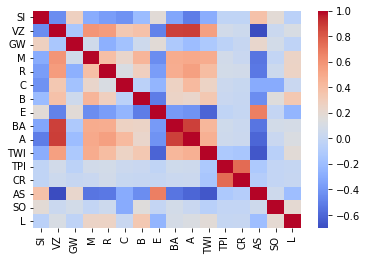

In [ ]:
sns.heatmap(dataset.corr(),cmap='coolwarm')

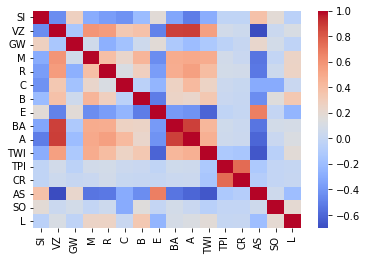

In [ ]:
sns.heatmap(dataset.corr(),cmap='coolwarm')

In [ ]:
X = dataset.iloc[:,2:]
Y = dataset.VZ

In [ ]:
feature_cols = ['Sl', 'VZ', 'GW', 'M', 'R', 'C', 'B', 'E', 'BA', 'A', 'TWI', 'TPI','CR', 'AS', 'SO', 'L']
#X = dataset[feature_cols] # Features
#Y = dataset.VZ # Target variable

In [ ]:
#df = dataset.pivot(columns= feature_cols , index='VZ')
#display(df)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926 entries, 0 to 925
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GW      926 non-null    int64  
 1   M       926 non-null    float64
 2   R       926 non-null    float64
 3   C       926 non-null    float64
 4   B       926 non-null    float64
 5   E       926 non-null    int64  
 6   BA      926 non-null    float64
 7   A       926 non-null    float64
 8   TWI     926 non-null    float64
 9   TPI     926 non-null    float64
 10  CR      926 non-null    float64
 11  AS      926 non-null    float64
 12  SO      926 non-null    int64  
 13  L       926 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 108.5 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
##X_train = min_max_scaler.fit_transform(X_train)
#X_test = min_max_scaler.fit_transform(X_test)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
# Predict test set labels
dt.fit(X_train, y_train)
DT_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, DT_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.78


In [ ]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        30
           2       0.76      0.73      0.74        44
           3       0.62      0.58      0.60        36
           4       0.67      0.85      0.75        33
           5       0.94      0.79      0.86        43

    accuracy                           0.78       186
   macro avg       0.79      0.79      0.78       186
weighted avg       0.79      0.78      0.78       186



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
NB_pred = clf_NB.predict(X_test)
NB_acc = accuracy_score(y_test, NB_pred)
print(NB_acc)

0.6612903225806451


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
KNN_pred = classifier.predict(X_test)
KNN_acc = accuracy_score(y_test, KNN_pred)
print(KNN_acc)

0.7903225806451613


**Multilayer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
nnc.fit(X_train, y_train)
nnc_pred =nnc.predict(X_test)
nnc_acc=accuracy_score(y_test, nnc_pred)
print(nnc_acc)

0.7311827956989247


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
randomf = RandomForestClassifier(n_estimators=100)
randomf.fit(X_train, y_train)
rf_pred = randomf.predict(X_test)
rf_acc=accuracy_score(y_test, rf_pred)
print(rf_acc)

0.8440860215053764


**Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
from  sklearn.utils import parallel_backend 
gboost = GradientBoostingClassifier(learning_rate=.1, n_estimators=500,max_depth=5 )
gboost.fit(X_train, y_train)
gboost_pred = gboost.predict(X_test)
from sklearn.metrics import accuracy_score
gboost_acc=accuracy_score(y_test, gboost_pred)
print(gboost_acc)

0.8440860215053764


**Xtreme Gradient Boost**

In [ ]:
import xgboost as xgb
xgbd = xgb.XGBClassifier(max_depth=10, n_estimators=5000 , learning_rate=.5, n_jobs=-1)
xgbd.fit(X_train, y_train)
xgb_pred = xgbd.predict(X_test)
xgb_acc=accuracy_score(y_test, xgb_pred)
print(xgb_acc)

0.8387096774193549


**Stacking : ANN-KNN-RF (Final estimator: RF)**

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
randomf = RandomForestClassifier(n_jobs=-1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import GridSearchCV
estimators = [('rf', randomf),('neural', nnc),
        ('knn',knn)
        ]
from sklearn.ensemble import StackingClassifier
final_estimator = {'final_estimator':[randomf,knn,nnc,None]}
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
newgsearchrandom =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=randomf)
newgsearchrandom.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
newgsearchrandom_pred = newgsearchrandom.predict(X_test)
newgsearchrandom_acc=accuracy_score(y_test, newgsearchrandom_pred)
print(newgsearchrandom_acc)

0.8440860215053764


**Stacking : ANN-KNN-RF (Final estimator: ANN)**

In [ ]:
newgsearchnnc =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=nnc)
newgsearchnnc.fit(X_train, y_train)
newgsearchnnc_pred = newgsearchnnc.predict(X_test)
newgsearchnnc_acc=accuracy_score(y_test, newgsearchnnc_pred)
print(newgsearchnnc_acc)

0.8440860215053764


**Stacking : ANN-KNN-RF (Final estimator: KNN)**

In [ ]:
newgsearchknn =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=knn)
newgsearchknn.fit(X_train, y_train)
newgsearchknn_pred = newgsearchknn.predict(X_test)
newgsearchknn_acc=accuracy_score(y_test, newgsearchknn_pred)
print(newgsearchknn_acc)

0.8440860215053764


**Linear SVM**

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=10, class_weight='balanced')
svc.fit(X_train, y_train)
SVM_pred = svc.predict(X_test)
SVM_acc = accuracy_score(y_test, SVM_pred)
print(SVM_acc)

0.3870967741935484


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


**SVM : RBF kernel**

In [ ]:
from sklearn.svm import SVC
svc_new = SVC(kernel ='rbf', class_weight='balanced')
svc_new.fit(X_train, y_train)
SVM_newpred = svc_new.predict(X_test)
SVMnew_acc = accuracy_score(y_test, SVM_newpred)
print(SVMnew_acc)

0.8172043010752689


**Ada Boost**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
randomf = RandomForestClassifier(n_jobs=-1)
dtree = DecisionTreeClassifier( criterion='entropy')
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(randomf, n_estimators=500000, learning_rate=.5)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
ab_acc=accuracy_score(y_test, ab_pred)
print(ab_acc)

0.8548387096774194


**Stochastic Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
sgd_acc=accuracy_score(y_test, sgd_pred)
print(sgd_acc)

0.3924731182795699


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


**Feature Selection**

**Feature selection using SelectFromModel**

In [ ]:
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(926, 6)

**Tree-based feature selection**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, Y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(926, 4)

**Sequential Feature Selection**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, Y)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),n_features_to_select=3)
sfs.get_support()
sfs.transform(X).shape

(926, 3)

**Feature selection as part of a pipeline**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
pipe.score(X_test, y_test)

0.8118279569892473

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [ ]:
X.shape

(926, 14)

In [ ]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(926, 6)

**Removing features with low variance**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[ 6.00000000e+00,  7.00000000e+00,  6.00000000e+01, ...,
         2.22222300e-01,  2.81309936e+02,  3.00000000e+00],
       [ 6.00000000e+00,  1.00000000e+01,  1.08166542e+02, ...,
        -6.66667000e-01,  3.00963745e+02,  4.00000000e+00],
       [ 6.00000000e+00,  7.00000000e+00,  3.00000000e+01, ...,
        -6.66667000e-01,  3.41565064e+02,  4.00000000e+00],
       ...,
       [ 7.00000000e+00,  1.00000000e+00,  4.24264069e+02, ...,
         0.00000000e+00, -1.00000000e+00,  6.00000000e+00],
       [ 7.00000000e+00,  1.00000000e+00,  4.17851654e+02, ...,
         0.00000000e+00, -1.00000000e+00,  6.00000000e+00],
       [ 7.00000000e+00,  1.00000000e+00,  3.94588379e+02, ...,
         0.00000000e+00, -1.00000000e+00,  6.00000000e+00]])

In [ ]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(926, 10)


In [ ]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(926, 2)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator

clf = Pipeline(
    [
        ("anova", SelectPercentile(chi2)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ]
)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 34

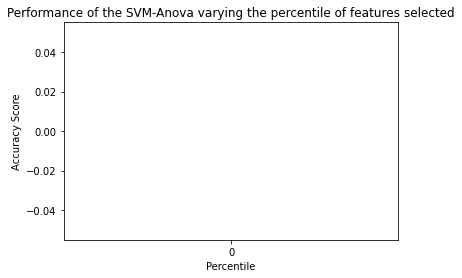

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, Y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()

In [ ]:
dataset.var()

Sl     936303.885513
VZ          2.031905
GW          2.968879
M           0.000097
R           0.000039
C           0.000012
B           0.000145
E           3.343450
BA      26975.710701
A       37977.632132
TWI         5.682391
TPI         0.299084
CR          0.028944
AS      13507.805311
SO          0.020119
L           1.033323
dtype: float64

In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
from typing import Optional
from qiskit.utils.algorithm_globals import algorithm_globals
from sklearn.svm import SVC

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.providers.aer import AerSimulator

from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel

if __name__ == '__main__':
    qc = QuantumCircuit(2)
    params = ParameterVector("x", 2)
    qc.ry(params[0], 0)
    qc.rx(params[1], 1)
    qk = QuantumKernel(qc, quantum_instance=AerSimulator())

    features = np.random.random(20)
    features = 2 * features - 1
    features = features.reshape(-1, 2)
    labels = np.sign(features[:, 0] * features[:, 1])

    qsvc = QSVC(quantum_kernel=qk)
    qsvc.fit(features, labels)
    score = qsvc.score(features, labels)
    print(score)

ModuleNotFoundError: ignored

In [ ]:
#from qiskit_machine_learning.algorithms.serializable_model import SerializableModelMixin
#rom qiskit_machine_learning.exceptions import QiskitMachineLearningWarning
#from qiskit_machine_learning.kernels.quantum_kernel import QuantumKernel

In [ ]:
qsvc = QSVC(quantum_kernel=qkernel)
qsvc.fit(X_train, y_train)
qsvc.predict(X_test)